### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [295]:
data = pd.read_csv('data/coupons.csv')

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [184]:
print("Number of missing values in each column:\n", data.isnull().sum())

Number of missing values in each column:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [186]:
print("\nNumber of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 74


3. Decide what to do about your missing data -- drop, replace, other...

In [220]:
data.update({'car': data['car'].fillna('Do Not Drive')})
data.update({'Bar': data['Bar'].fillna('Never')})
data.update({'CoffeeHouse': data['CoffeeHouse'].fillna('Never')})
data.update({'CarryAway': data['CarryAway'].fillna('Never')})
data.update({'RestaurantLessThan20': data['RestaurantLessThan20'].fillna('Never')})
data.update({'Restaurant20To50': data['Restaurant20To50'].fillna('Never')})



4. What proportion of the total observations chose to accept the coupon?



In [315]:



accepted_coupons = data['Y'].sum() 
total_observations = data['Y'].count() 

overall_acceptance_rate = accepted_coupons / total_observations

print(f"Proportion of accepted coupons: {round(overall_acceptance_rate, 2)}") 

Proportion of accepted coupons: 0.57


5. Use a bar plot to visualize the `coupon` column.

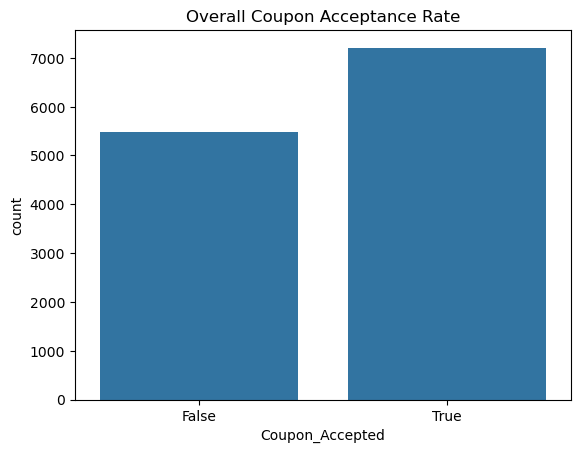

In [320]:
data['Coupon_Accepted'] = data['Y'] == 1
accepted_count = (data['Y'] == 1).sum() 
#Acceptance rate
sns.countplot(x='Coupon_Accepted', data=data)
plt.title('Overall Coupon Acceptance Rate')
plt.show()

6. Use a histogram to visualize the temperature column.

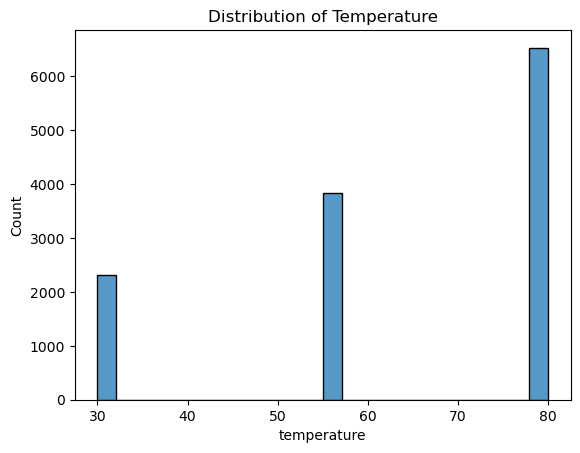

In [322]:
sns.histplot(data=data, x='temperature') 
plt.title('Distribution of Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [324]:
# Create a new DataFrame containing only bar coupons
bar_coupons_df = data[data['coupon'] == 'Bar']

# Display the new DataFrame
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Coupon_Accepted
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,False
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,1,0,1,True
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,1,0,1,0,False
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,True
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,True


2. What proportion of bar coupons were accepted?


In [326]:
# Filter for bar coupons
bar_coupons = data[data['coupon'] == 'Bar']

# Calculate the number of accepted bar coupons
accepted_bar_coupons = (bar_coupons['Y'] == 1).sum()

# Calculate the total number of bar coupons
total_bar_coupons = len(bar_coupons)

# Calculate the proportion of accepted bar coupons
proportion_accepted_bar = accepted_bar_coupons / total_bar_coupons

# Print the result
print(f"Proportion of accepted bar coupons: {round(proportion_accepted_bar,2)}")

Proportion of accepted bar coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [328]:
# Filter for users who visit a bar 3 or fewer times a month
low_bar_visits = data[data['Bar'].isin(['less1', '1~3'])]

# Filter for users who visit a bar more than 3 times a month
high_bar_visits = data[data['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates for each group
acceptance_rate_low = low_bar_visits['Y'].sum() / low_bar_visits['Y'].count()
acceptance_rate_high = high_bar_visits['Y'].sum() / high_bar_visits['Y'].count()

# Print the results
print(f"Acceptance Rate for 3 or fewer bar visits per month: {round(acceptance_rate_low,2)}")
print(f"Acceptance Rate for more than 3 bar visits per month: {round(acceptance_rate_high,2)}")

Acceptance Rate for 3 or fewer bar visits per month: 0.59
Acceptance Rate for more than 3 bar visits per month: 0.62


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [330]:
# Filter for drivers who go to a bar more than once a month and are 26 or older
target_group = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] != 'Under 21') & (data['age'] != '21')] 

# Calculate acceptance rate for the target group
target_acceptance_rate = target_group[target_group['Y'] == 1]['Y'].count() / target_group['Y'].count() 

# Filter for all other drivers
other_group = data[~((data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] != 'Under 21') & (data['age'] != '21'))]

# Calculate acceptance rate for all other drivers
other_acceptance_rate = other_group[other_group['Y'] == 1]['Y'].count() / other_group['Y'].count() 

# Print the results
print(f"Acceptance Rate for drivers who go to a bar more than once a month and are 26 or older: {round(target_acceptance_rate, 2)}")
print(f"Acceptance Rate for Other Drivers: {round(other_acceptance_rate, 2)}")

# Check for significant difference (you might want to use a statistical test)
if (target_acceptance_rate - other_acceptance_rate) > 0:  # Example threshold, adjust as needed
    print("There appears to be a higher rate acceptance rates for drivers who go to a bar more than once a month and are 26 or older.")
else:
    print("There appears to be a lower rate acceptance rates for drivers who go to a bar more than once a month and are 26 or older.") 

Acceptance Rate for drivers who go to a bar more than once a month and are 26 or older: 0.62
Acceptance Rate for Other Drivers: 0.55
There appears to be a higher rate acceptance rates for drivers who go to a bar more than once a month and are 26 or older.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [332]:
# Filter for drivers who meet the specific criteria
target_group = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # Go to bars more than once a month
    (data['passanger'] != 'Kid(s)') &  # No kids as passengers
    ~data['occupation'].isin(['Farming', 'Fishing', 'Forestry'])  # Exclude specific occupations
]

# Calculate acceptance rate for the target group
target_acceptance_rate = target_group[target_group['Y'] == 1]['Y'].count() / target_group['Y'].count()

# Filter for all other drivers
other_group = data[~((data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                    (data['passanger'] != 'Kid(s)') & 
                    ~data['occupation'].isin(['Farming', 'Fishing', 'Forestry']))]

# Calculate acceptance rate for all other drivers
other_acceptance_rate = other_group[other_group['Y'] == 1]['Y'].count() / other_group['Y'].count()

# Print the results
print(f"Acceptance Rate for There appears to be a higher rate of acceptance for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {round(target_acceptance_rate, 2)}")
print(f"Acceptance Rate for Other Drivers: {round(other_acceptance_rate, 2)}")

# Check for significant difference (you might want to use a statistical test)
if (target_acceptance_rate - other_acceptance_rate) > 0:  # Example threshold, adjust as needed
    print("\nThere appears to be a higher rate of acceptance for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.")
else:
    print("\nThere appears to be a lower rate of acceptance for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.")

Acceptance Rate for There appears to be a higher rate of acceptance for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 0.62
Acceptance Rate for Other Drivers: 0.55

There appears to be a higher rate of acceptance for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [336]:
# Define conditions for each group
cond1 = (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['passanger'] != 'Kid(s)') & (data['maritalStatus'] != 'Widowed')
cond2 = (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'].isin(['Under 21', '21', '26'])) 
cond3 = (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))


# Filter for the first group
group1 = data[cond1]
group1_acceptance_rate = group1[group1['Y'] == 1]['Y'].count() / group1['Y'].count()

# Filter for the second group
group2 = data[cond2]
group2_acceptance_rate = group2[group2['Y'] == 1]['Y'].count() / group2['Y'].count()

# Filter for the third group
group3 = data[cond3]

group3_acceptance_rate = group3[group3['Y'] == 1]['Y'].count() / group3['Y'].count()

# Print the results
print(f"Acceptance Rate for Group 1: {round(group1_acceptance_rate, 2)}")
print(f"Acceptance Rate for Group 2: {round(group2_acceptance_rate, 2)}")
print(f"Acceptance Rate for Group 3: {round(group3_acceptance_rate, 2)}") 

Acceptance Rate for Group 1: 0.62
Acceptance Rate for Group 2: 0.63
Acceptance Rate for Group 3: 0.6


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

There is higher acceptance by those who go to bars more than once a month and are under the age of 30 folllowed by those who go to bars more than once a month, had passengers that were not a kid, and were not widowed.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

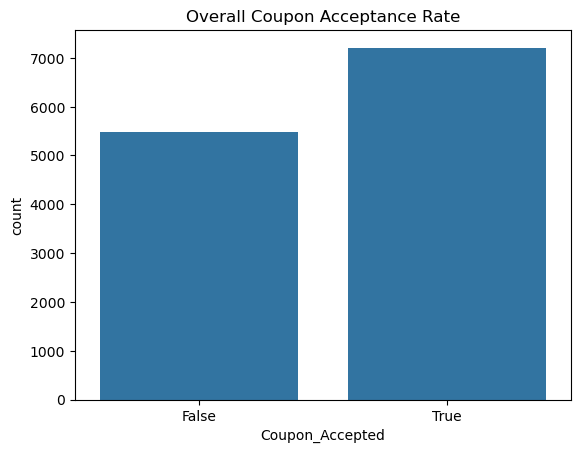

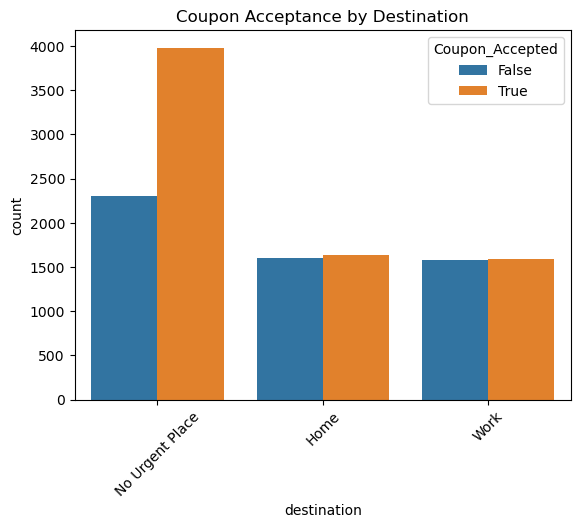

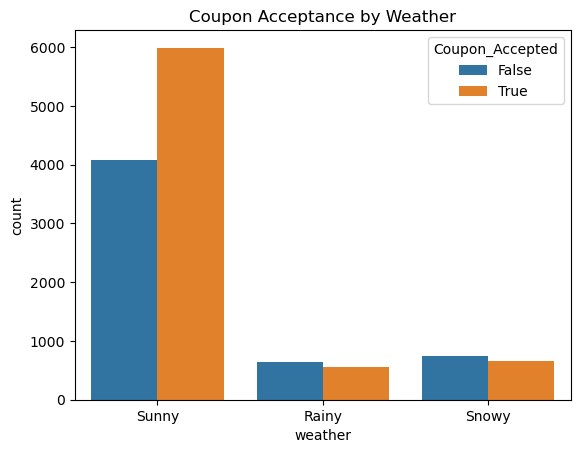

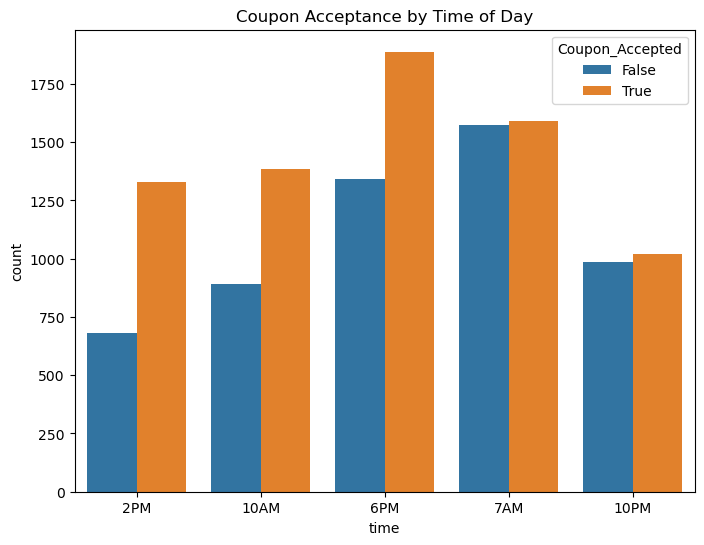

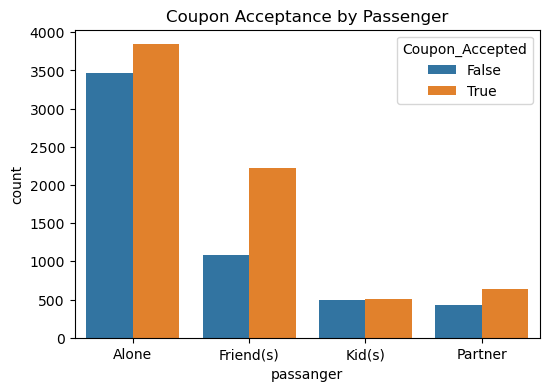

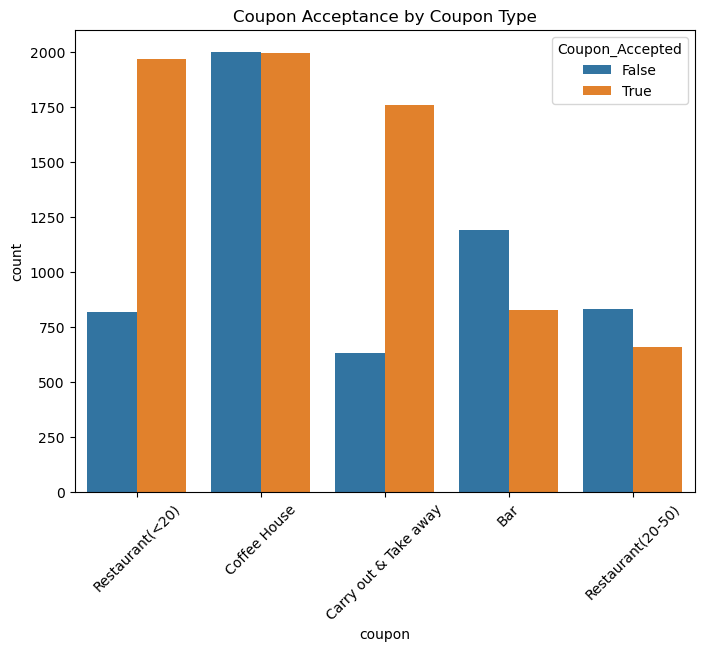

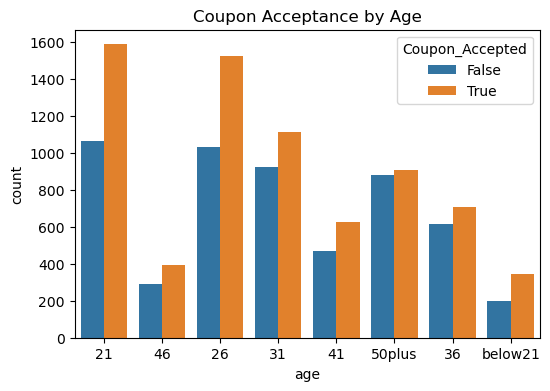

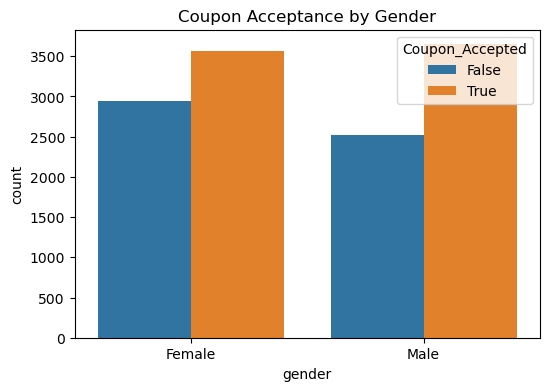

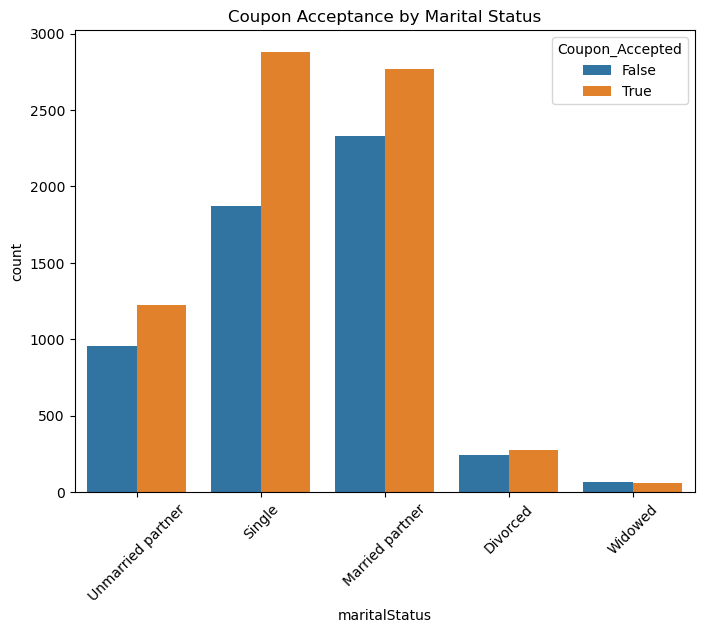

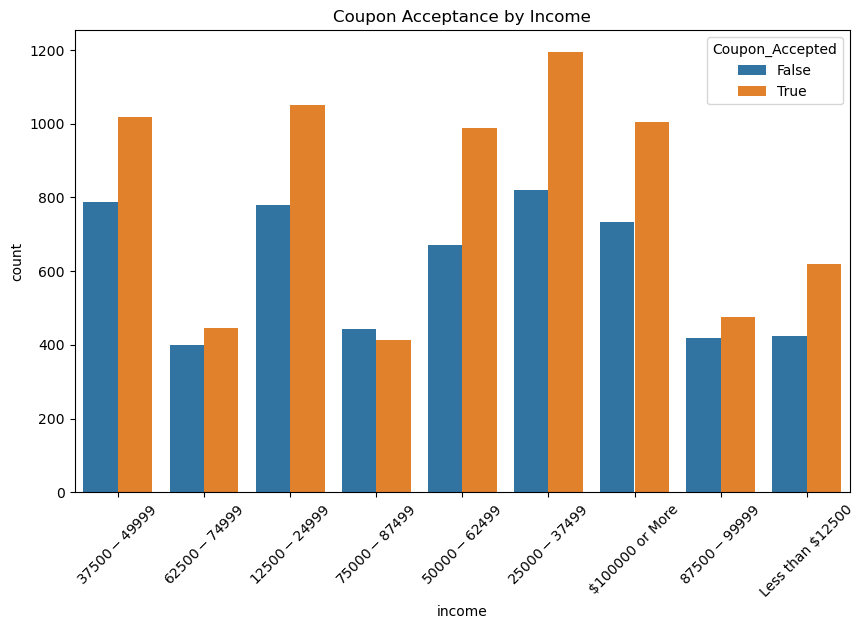

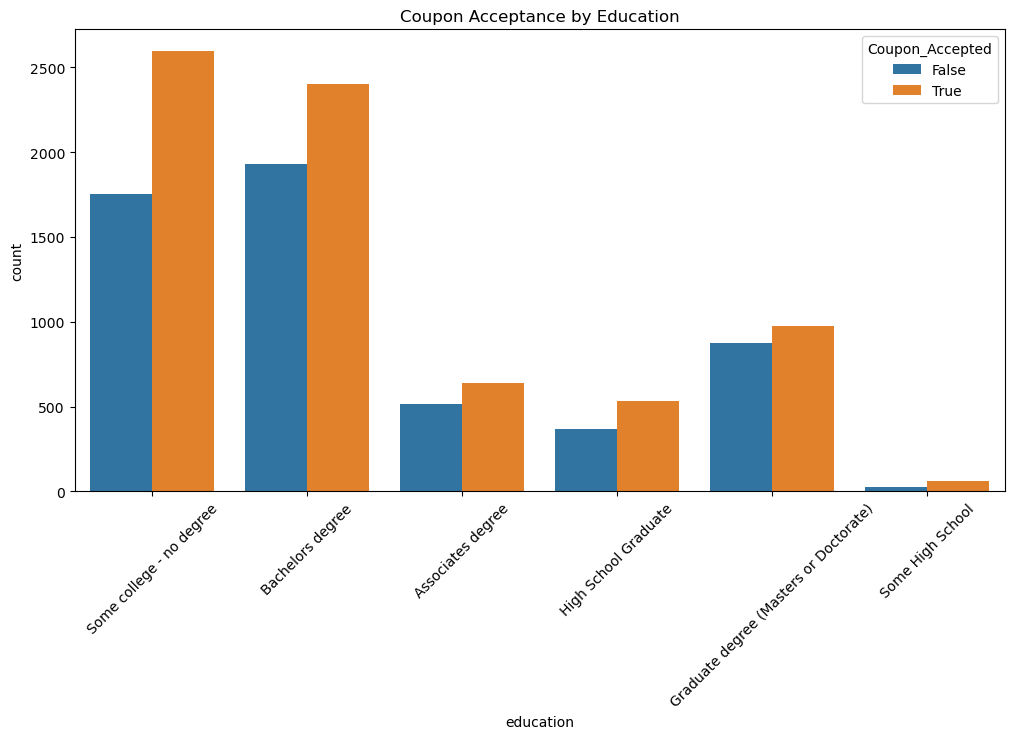

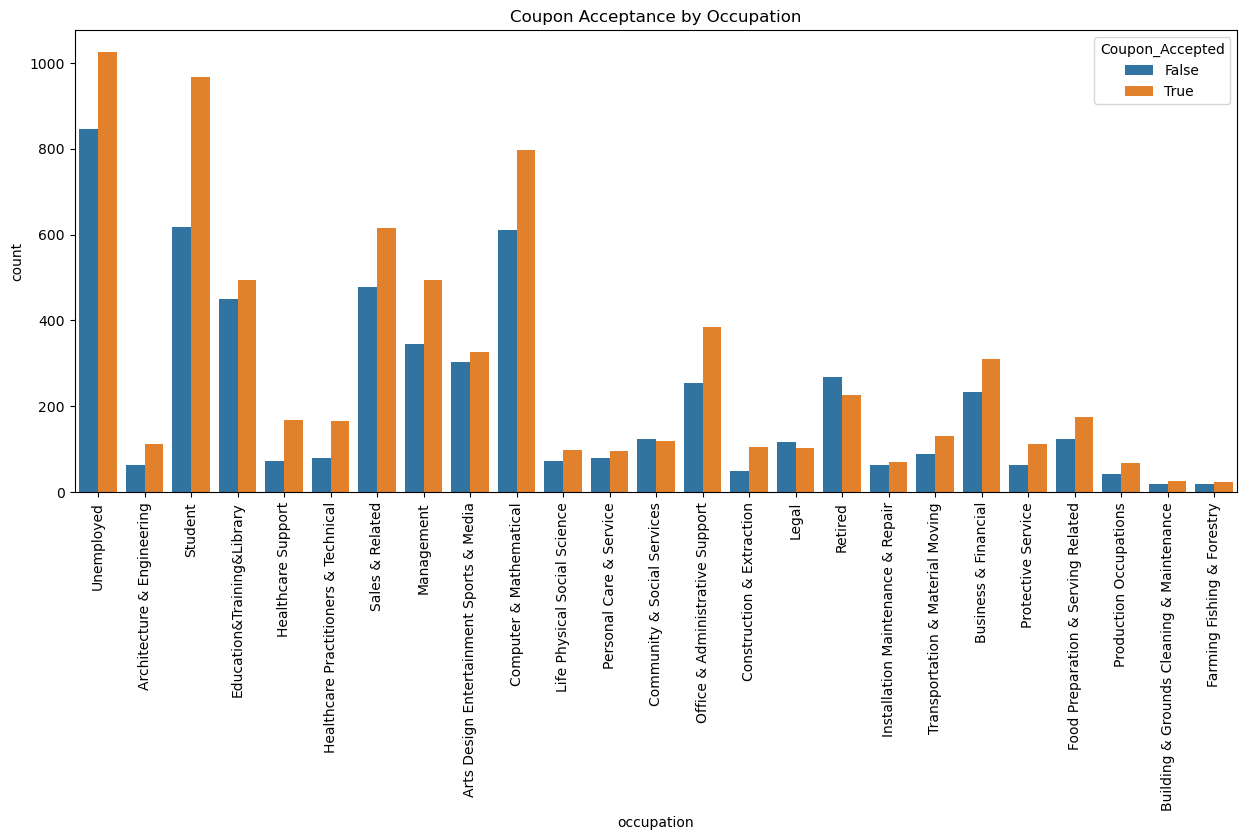

In [338]:
data['Coupon_Accepted'] = data['Y'] == 1

#Acceptance rate
sns.countplot(x='Coupon_Accepted', data=data)
plt.title('Overall Coupon Acceptance Rate')
plt.show()

# Acceptance Rate by Destination
sns.countplot(x='destination', hue='Coupon_Accepted', data=data)
plt.title('Coupon Acceptance by Destination')
plt.xticks(rotation=45)
plt.show()

# Acceptance Rate by Weather

sns.countplot(x='weather', hue='Coupon_Accepted', data=data)
plt.title('Coupon Acceptance by Weather')
plt.show()

# Acceptance Rate by Time of Day
plt.figure(figsize=(8, 6))
sns.countplot(x='time', hue='Coupon_Accepted', data=data)
plt.title('Coupon Acceptance by Time of Day')
plt.show()

# Acceptance Rate by Passenger
plt.figure(figsize=(6, 4))
sns.countplot(x='passanger', hue='Coupon_Accepted', data=data)
plt.title('Coupon Acceptance by Passenger')
plt.show()

# Acceptance Rate by Coupon Type
plt.figure(figsize=(8, 6))
sns.countplot(x='coupon', hue='Coupon_Accepted', data=data)
plt.title('Coupon Acceptance by Coupon Type')
plt.xticks(rotation=45)
plt.show()

# Acceptance Rate by Age Group
plt.figure(figsize=(6, 4))
sns.countplot(x='age', hue='Coupon_Accepted', data=data)
plt.title('Coupon Acceptance by Age')
plt.show()

# Acceptance Rate by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Coupon_Accepted', data=data)
plt.title('Coupon Acceptance by Gender')
plt.show()

# Acceptance Rate by Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(x='maritalStatus', hue='Coupon_Accepted', data=data)
plt.title('Coupon Acceptance by Marital Status')
plt.xticks(rotation=45)
plt.show()

# Acceptance Rate by Income
plt.figure(figsize=(10, 6))
sns.countplot(x='income', hue='Coupon_Accepted', data=data)
plt.title('Coupon Acceptance by Income')
plt.xticks(rotation=45)
plt.show()

# Acceptance Rate by Education
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='Coupon_Accepted', data=data)
plt.title('Coupon Acceptance by Education')
plt.xticks(rotation=45)
plt.show()

# Acceptance Rate by Occupation (may require adjustments for readability)
plt.figure(figsize=(15, 6))
sns.countplot(x='occupation', hue='Coupon_Accepted', data=data)
plt.title('Coupon Acceptance by Occupation')
plt.xticks(rotation=90) 
plt.show()